In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Abbiamo scelto un dataset su Barcellona;
#iniziamo analizzando i dati sull'immigrazione per nazionalità.

file_name ="./immigrants_by_nationality.csv"
imm_naz = pd.read_csv(file_name)
print(imm_naz)

In [ ]:
#Eseguo un describe sul dataset anche se non si possono estrarre molte info se non per "Number"
imm_naz.describe()

In [17]:
#quanti elementi sono unici per ogni colonna
imm_naz.nunique()


Year                   3
District Code         11
District Name         11
Neighborhood Code     74
Neighborhood Name     74
Nationality          177
Number               352
dtype: int64

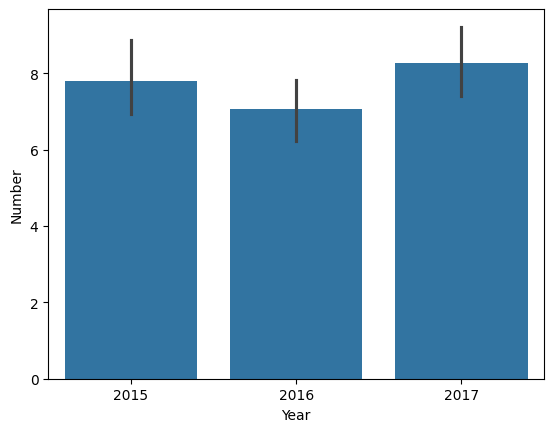

In [28]:
# 1) Distribuzione temporale dell'immigrazione negli anni:
# Utilizziamo seaborn per graficare le info 

sns.barplot(data=imm_naz,x='Year',y='Number')
plt.show()


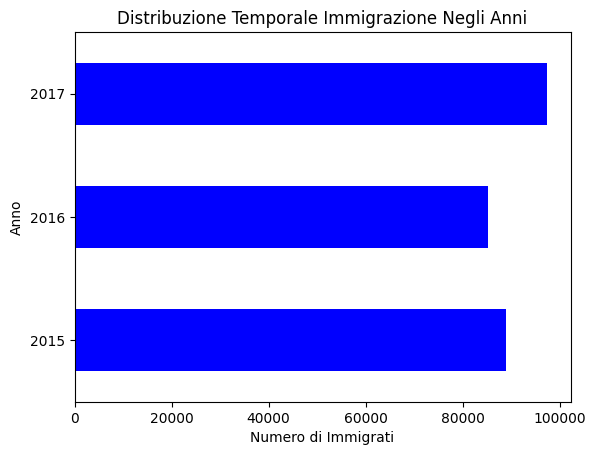

In [16]:
#Alternativa con pandas:

tot_imm= imm_naz.groupby(['Year'])['Number'].sum()
#print(tot_imm)

tot_imm.plot(kind= 'barh', color='b')
plt.title('Distribuzione Temporale Immigrazione Negli Anni')
plt.xlabel('Numero di Immigrati')
plt.ylabel('Anno')
plt.show()


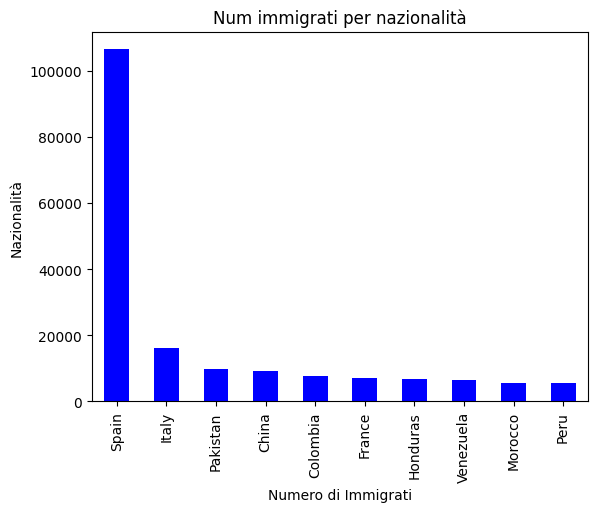

In [19]:
#2) Nazionalità: da dove provengono gli immigrati?
# Poichè i valori unici di "Nationality"presenti nel dataset sono 177(vedi comando 'nunique()'), mostriamo solo le prime 10.

top10_naz= imm_naz.groupby(['Nationality'])['Number'].sum().sort_values(ascending=False).head(10)
#print(top10_naz)
top10_naz.plot(kind='bar', color='b')

plt.title('Num immigrati per nazionalità')
plt.xlabel('Numero di Immigrati')
plt.ylabel('Nazionalità')

plt.show()

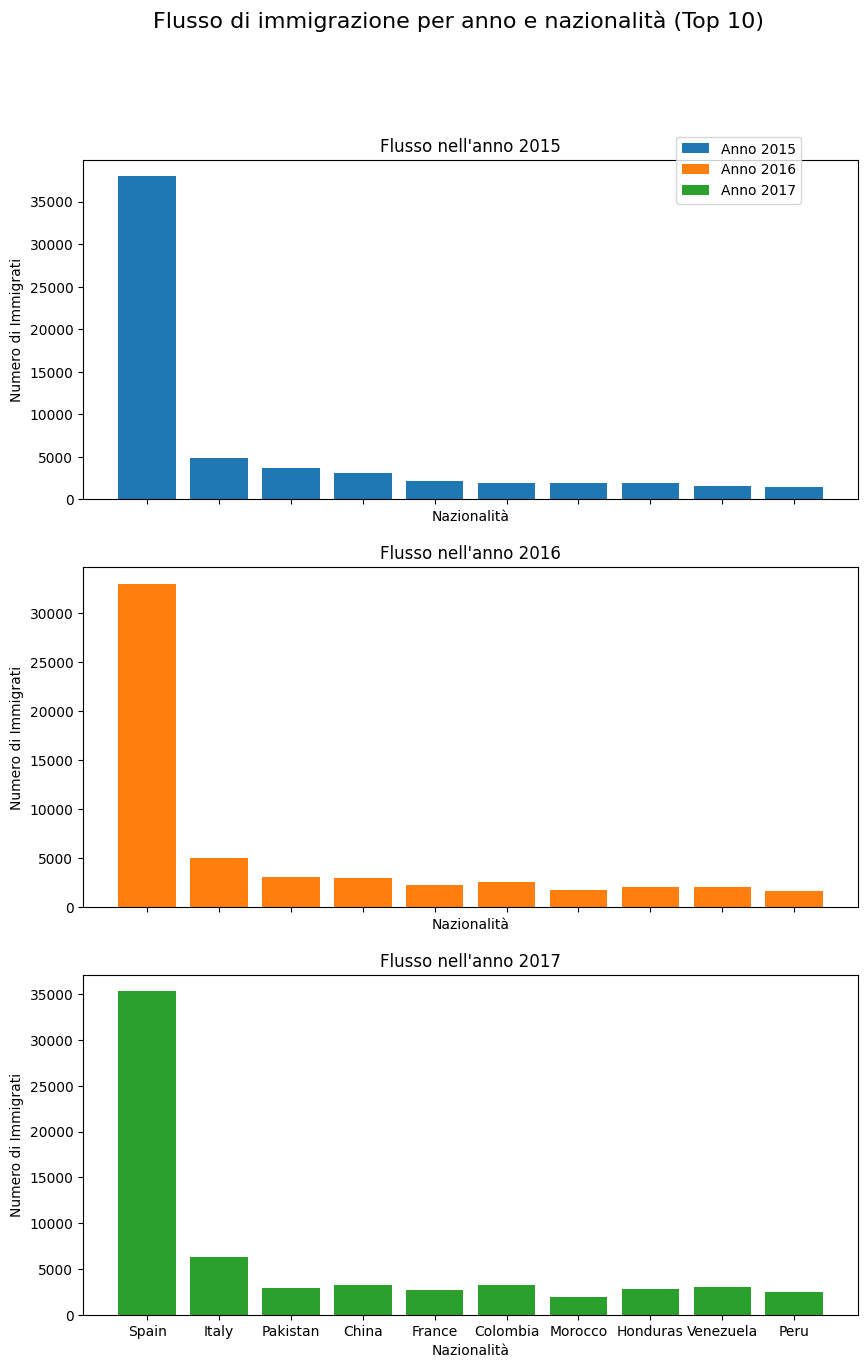

In [20]:
#Approfondimento del 2 anno per anno:

flusso_immigrazione = imm_naz.groupby(["Year", "Nationality"])["Number"].sum().sort_values(ascending=False)

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for i, anno in enumerate([2015, 2016, 2017]):
    flusso_anno = flusso_immigrazione.loc[anno].head(10)
    axs[i].bar(flusso_anno.index, flusso_anno.values, label=f'Anno {anno}', color=f'C{i}')
    axs[i].set_title(f"Flusso nell'anno {anno}")
    axs[i].set_xlabel('Nazionalità')
    axs[i].set_ylabel('Numero di Immigrati')

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

fig.suptitle("Flusso di immigrazione per anno e nazionalità (Top 10)", fontsize=16)
plt.show()

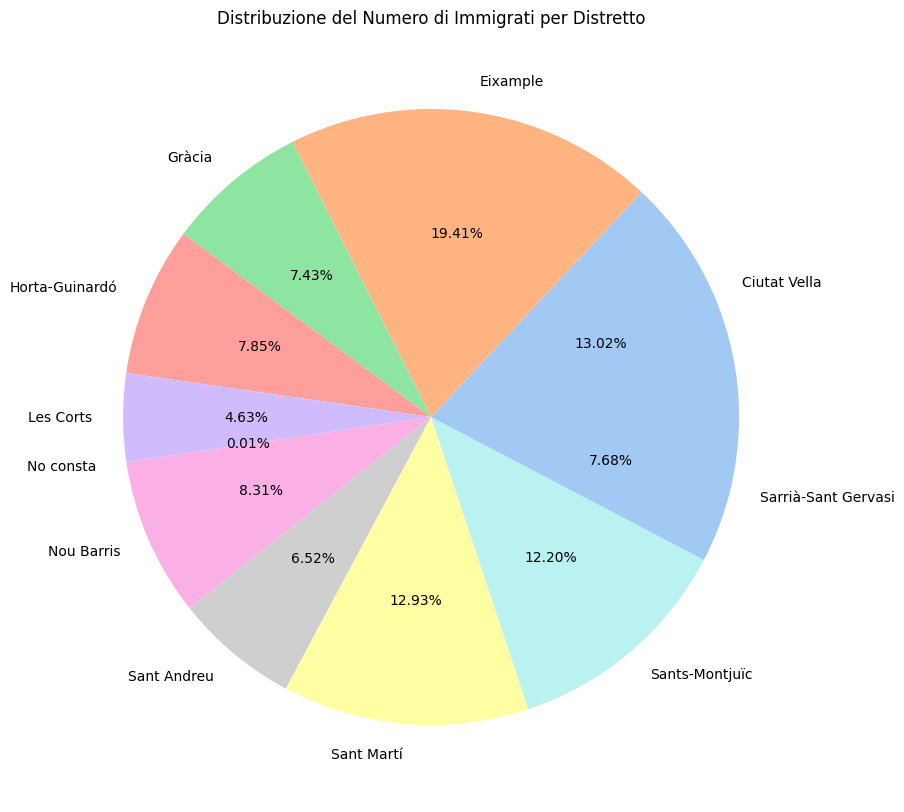

In [22]:
#3) Quali quartieri hanno ricevuto più immigrati:

quartieri= imm_naz.groupby(["District Name"])['Number'].sum()
#print(quartieri)

plt.figure(figsize=(10, 10))
quartieri.plot(kind='pie', autopct='%1.2f%%',colors=sns.color_palette('pastel'),subplots=True)
plt.title('Distribuzione del Numero di Immigrati per Distretto')

plt.ylabel('')
plt.show()
